<a href="https://colab.research.google.com/github/ShivathejS/project/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [41]:
df = pd.read_csv('Advertising.csv')

In [42]:
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [43]:
df.shape

(200, 5)

In [44]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [45]:
df.columns


Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [46]:
df = df.drop('Unnamed: 0', axis=1)

In [47]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [48]:
df.head(6)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


In [49]:
df.columns.tolist()


['TV', 'Radio', 'Newspaper', 'Sales']

In [50]:
x = df.drop('Sales', axis = 1)
y = df['Sales']

In [53]:
y.sample(5)

,Sales
96,11.7
93,22.2
25,12.0
0,22.1
19,14.6


In [54]:
x.sample(5)

,TV,Radio,Newspaper
89,109.8,47.8,51.4
142,220.5,33.2,37.9
68,237.4,27.5,11.0
47,239.9,41.5,18.5
2,17.2,45.9,69.3


In [55]:
#now training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,  random_state = 42)

In [56]:
#testing with linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [57]:
lr.fit(x_train, y_train)

LinearRegression()

In [58]:
y_pred = lr.predict(x_test)

In [62]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2)
print(mse)

0.899438024100912
3.1740973539761033


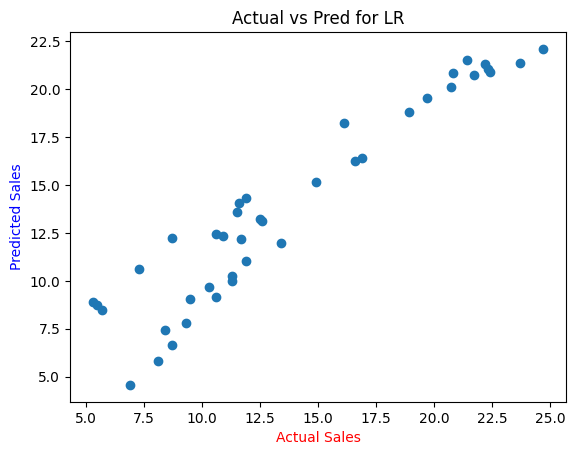

In [66]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales", color='red')
plt.ylabel("Predicted Sales", color='blue')
plt.title('Actual vs Pred for LR')
plt.show()

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42)
rf.fit(x_train, y_train)



RandomForestRegressor(n_estimators=200, random_state=42)

In [76]:
y_pred1 = rf.predict(x_test)


In [77]:
r2 = r2_score(y_test, y_pred1)
print(r2)

0.9818333477552758


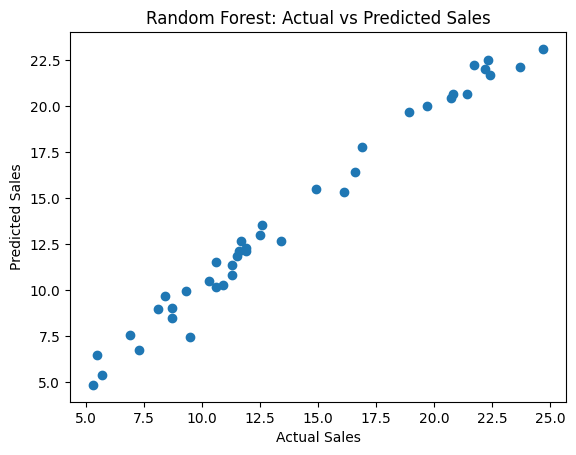

In [79]:
# Random forest regression shows the best accuracy of 98%
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.show()


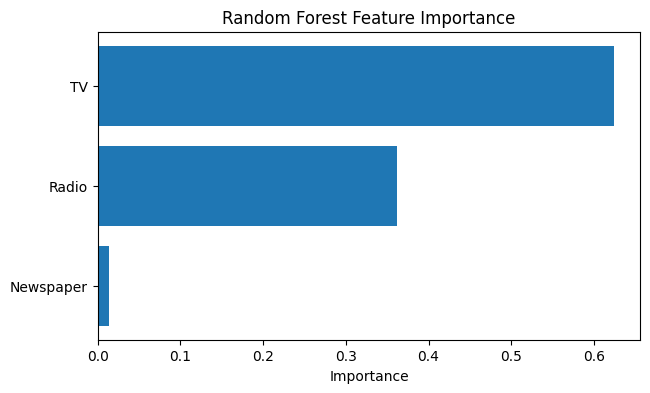

In [75]:
importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(7,4))
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()


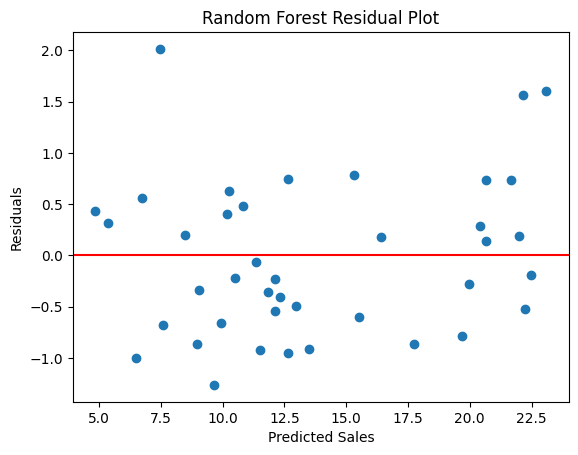

In [81]:
#as we can see, tv advertising shows the most importance.
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Random Forest Residual Plot")
plt.show()


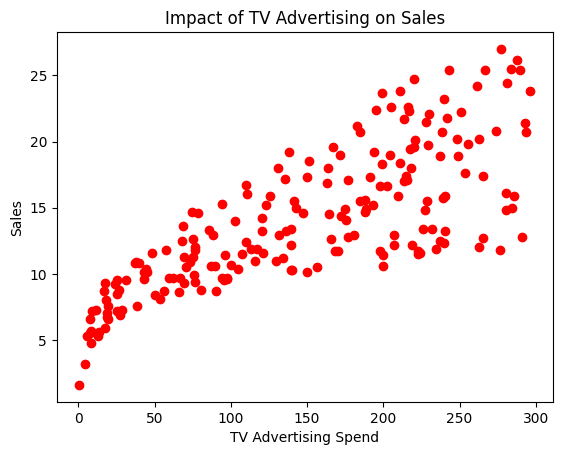

In [82]:
plt.scatter(df['TV'], df['Sales'], color='red')
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Impact of TV Advertising on Sales")
plt.show()


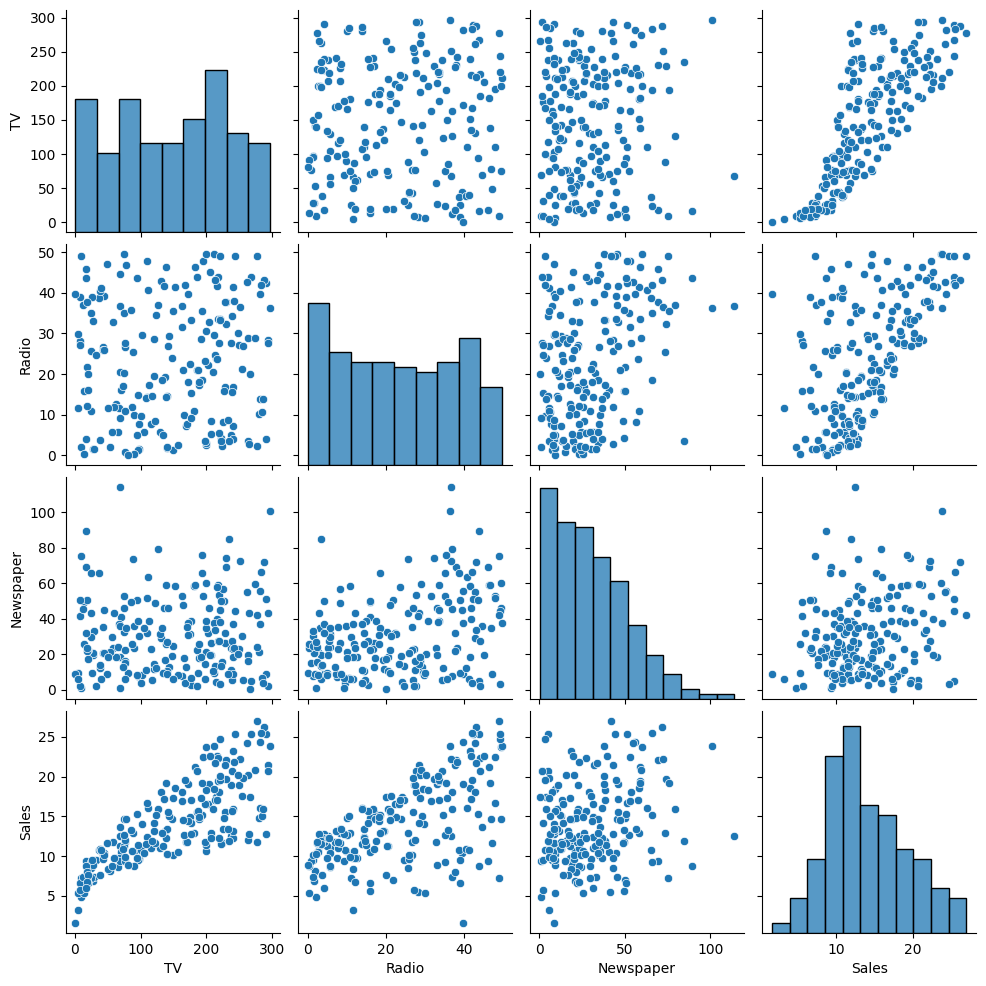

In [84]:
import seaborn as sns
sns.pairplot(df)
plt.show()


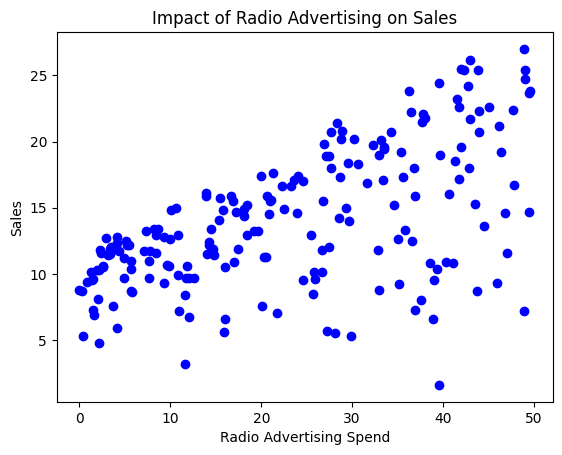

In [85]:
plt.scatter(df['Radio'], df['Sales'], color='blue')
plt.xlabel("Radio Advertising Spend")
plt.ylabel("Sales")
plt.title("Impact of Radio Advertising on Sales")
plt.show()
